In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
models = {}

for model in ['LR', 'RF', 'GB']:
    models[model] = joblib.load('{}.pkl'.format(model))

## Validation

In [4]:
def evaluate_model(name, model, X, y):
    y_pred = model.predict(X)
    accuracy = round(100*accuracy_score(y, y_pred), 2)
    f1 = round(100*f1_score(y, y_pred), 2)
    print('{} Accuracy: {} / F1 Score: {}'.format(name, accuracy, f1))
    return

In [5]:
for model in ['LR', 'RF', 'GB']:
    evaluate_model(model, models[model], X_val, y_val)

LR Accuracy: 74.52 / F1 Score: 72.45
RF Accuracy: 80.82 / F1 Score: 78.9
GB Accuracy: 79.17 / F1 Score: 77.56


## Test 

In [6]:
# using best performing model on test set:
y_pred = models['RF'].predict(X_test)

accuracy = round(100*accuracy_score(y_test, y_pred), 2)
f1 = round(100*f1_score(y_test, y_pred), 2)

print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 82.32
F1 Score: 81.27


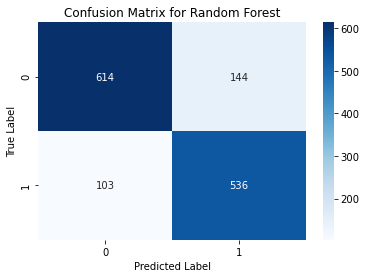

In [7]:
# confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, y_pred), 
                 cmap='Blues', 
                 annot=True, 
                 fmt='g')
ax.set(ylabel='True Label', xlabel='Predicted Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

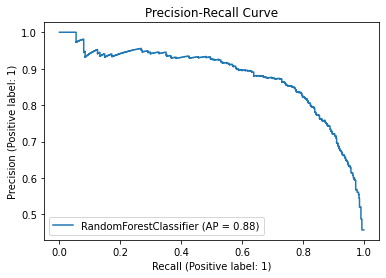

In [8]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(models['RF'], X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()